<div style="text-align: center; font-family: Arial, sans-serif; padding: 20px; border: 2px solid #390808ff; border-radius: 10px; background-color: #ffffffff;">
    <h1 style="color: #6f1919ff; font-size: 2.5em; font-weight: bold;">Next-Day Rain Forecasting Model</h1>
    <div>
        <p style="font-size: 1.2em; margin: 5px 0; text-align: center; font-weight: bold; color: black;"><strong>Author:</strong> Anand Krishna G K</p>
        <p style="font-size: 1.2em; margin: 5px 0; text-align: center; font-weight: bold; color: black;"><strong>Date:</strong> 05/12/2025</p>
    </div>
</div>


### <font color='BLUE'>TABLE OF CONTENTS</font>

1. &nbsp; **Problem Statement**
2. &nbsp; **Objective**
3. &nbsp; **Data Collection**
4. &nbsp; **Data Description**
5. &nbsp; **Exploratory Data Analysis (EDA) & Data Preprocessing**
6. &nbsp; **Visualization**
7. &nbsp; **Feature Engineering**
8. &nbsp; **Data Splitting**
9. &nbsp; **Model Selection**
11. &nbsp; **Model Training**
12. &nbsp; **Model Evaluation**
13. &nbsp; **Hyperparameter Tuning**
14. &nbsp; **Results**
15. &nbsp; **Model Deployment**
16. &nbsp; **Limitations**
17. &nbsp; **Conclusion**


### <font color='BLUE'>PROBLEM STATEMENT</font>

This project focuses on developing a machine learning model to predict whether it will rain the next day using a large-scale weather dataset containing nearly 150,000 daily observations collected from multiple locations across Australia. The dataset includes key meteorological variables such as temperature, humidity, rainfall, wind speed, wind direction, atmospheric pressure, cloud cover, and sunshine duration.

Next-day rainfall prediction is an important task for weather forecasting, agriculture, transportation planning, and public safety. Accurate prediction models can help individuals and organizations make informed decisions, prepare for adverse weather, and optimize resource planning.

The target variable RainTomorrow is a binary label indicating whether rainfall of 1 mm or more will occur the following day (“Yes” or “No”). The goal of this project is to build a reliable binary classification model capable of analyzing historical weather patterns and predicting next-day rain with high accuracy.

### <font color='BLUE'>OBJECTIVE</font>

The objective of this project is to build an accurate and efficient machine learning model that predicts whether it will rain the next day based on historical weather observations. This involves performing data preprocessing, exploratory data analysis, feature engineering, and training multiple classification algorithms to identify the most effective model. The final goal is to develop a reliable prediction system that can support weather-based planning and decision-making.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='BLUE'>DATA COLLECTTION</font>

In [105]:
#Load the dataset
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### <font color='BLUE'>DATA DESCRIPTION</font>
Data set : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

The dataset used in this project contains nearly 150,000 daily weather observations recorded across multiple locations in Australia over a span of approximately 10 years. Each row represents weather conditions for a specific day at a specific location, and the columns capture a wide range of meteorological measurements. These features provide essential environmental indicators for predicting whether it will rain the following day.

The key attributes in the dataset include:

- **_Date_**  :  The date of the observation.  
- **_Location_**  :  The Australian city or region where the weather data was recorded.  
- **_MinTemp_**  :  Minimum temperature (°C) recorded for the day.  
- **_MaxTemp_**  :  Maximum temperature (°C) recorded for the day.  
- **_Rainfall_**  :  Total rainfall (mm) recorded for the day.  
- **_Evaporation_**  :  Amount of water evaporated (mm) from surfaces such as soil and plants.  
- **_Sunshine_**  :  Number of hours of bright sunshine received during the day.  
- **_WindGustDir_**  :  Direction of the strongest wind gust.  
- **_WindGustSpeed_**  :  Maximum wind gust speed (km/h).  
- **_WindDir9am_**  :  Wind direction measured at 9:00 AM.  
- **_WindDir3pm_**  :  Wind direction measured at 3:00 PM.  
- **_WindSpeed9am_**  :  Wind speed (km/h) measured at 9:00 AM.  
- **_WindSpeed3pm_**  :  Wind speed (km/h) measured at 3:00 PM.  
- **_Humidity9am_**  :  Relative humidity (%) at 9:00 AM.  
- **_Humidity3pm_**  :  Relative humidity (%) at 3:00 PM.  
- **_Pressure9am_**  :  Atmospheric pressure (hPa) at 9:00 AM.  
- **_Pressure3pm_**  :  Atmospheric pressure (hPa) at 3:00 PM.  
- **_Cloud9am_**  :  Fraction of the sky covered by clouds at 9:00 AM.  
- **_Cloud3pm_**  :  Fraction of the sky covered by clouds at 3:00 PM.  
- **_Temp9am_**  :  Temperature (°C) measured at 9:00 AM.  
- **_Temp3pm_**  :  Temperature (°C) measured at 3:00 PM.  
- **_RainToday_**  :  Indicates whether rainfall of 1 mm or more occurred today (Yes/No).  
- **_RainTomorrow_**  :  Target variable indicating whether rainfall of 1 mm or more will occur tomorrow (Yes/No).

This dataset offers a rich and diverse collection of meteorological features, enabling the development of a robust binary classification model. By analyzing historical weather trends and atmospheric patterns, the model aims to accurately predict next-day rainfall, supporting improved decision-making in agriculture, transportation, and daily planning.

### <font color='BLUE'>EXPLORATORY DATA ANALYSIS (EDA) & DATA PREPROCESSING</font>

In [4]:
#Size of the dataset
df.shape

(145460, 23)

*The dataset contains 145460 rows (indices) and 23 columns (features)*

In [5]:
# Display the first 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Display the last 5 rows
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
# Display a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Display the list of column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


#### UNDERSTANDING DISTRIBUTION OF DATA

In [10]:
#Finding unique values in each column and its count
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Unique values in Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique values in MinTemp: [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3

In [11]:
for column in df.columns:
    print(df[column].value_counts())
    print("_"*100)

Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
____________________________________________________________________________________________________
Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
Badgerys

In [12]:
#Finding count of unique values in target variable
df["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

#### IDENTIFYING NUMERICAL AND CATEGORICAL COLUMNS

In [13]:
# Filter columns with numeric data types 
num_cols = df.select_dtypes (include = "number").columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [14]:
# Filter columns with object data types
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

*Out of 23 columns, 16 are continuous numerical columns, and the remaining 7 are categorical columns.*

#### CHECKING FOR DUPLICATES

In [15]:
#Taking sum of duplicate values
df.duplicated().sum()

np.int64(0)

*There are no duplicate rows in the dataset.*

#### CHECKING NULL VALUES

In [16]:
#Sum of null values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
#Percentage of null values in each column
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

*Many features are well-populated, and Date and Location contain no null values.*
*Still, Evaporation, Sunshine, Cloud9am, and Cloud3pm show substantial missing data exceeding 25%.*

#### NULL VALUE HANDLING

In [18]:
#Creating a copy for preprocessing to preserve the original data.
df1=df.copy()
df1.shape

(145460, 23)

In [19]:
#Drop columns with more than 25% of null values
df1.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],inplace=True)

*These columns were removed because they had more than 25% missing values, and strong alternative predictors such as humidity, pressure, wind, rainfall, and temperature.*

In [20]:
#Drop the rows where the target is missing
df1.dropna(subset=["RainTomorrow"], inplace=True)

In [21]:
#Updated numerical columns
num_cols1 = num_cols.difference(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
num_cols1

Index(['Humidity3pm', 'Humidity9am', 'MaxTemp', 'MinTemp', 'Pressure3pm',
       'Pressure9am', 'Rainfall', 'Temp3pm', 'Temp9am', 'WindGustSpeed',
       'WindSpeed3pm', 'WindSpeed9am'],
      dtype='object')

In [22]:
#Fill missing values using median for numerical columns
df1[num_cols1] = df1[num_cols1].fillna(df1[num_cols1].median())

In [23]:
#Fill missing values using mode for categorical columns
cat_cols_nan = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df1[cat_cols_nan] = df1[cat_cols_nan].fillna(df1[cat_cols_nan].mode().iloc[0])


In [24]:
#Recheck for null values
df1.isnull().sum()/len(df1)*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

#### ANALYSING NUMERICAL COLUMNS

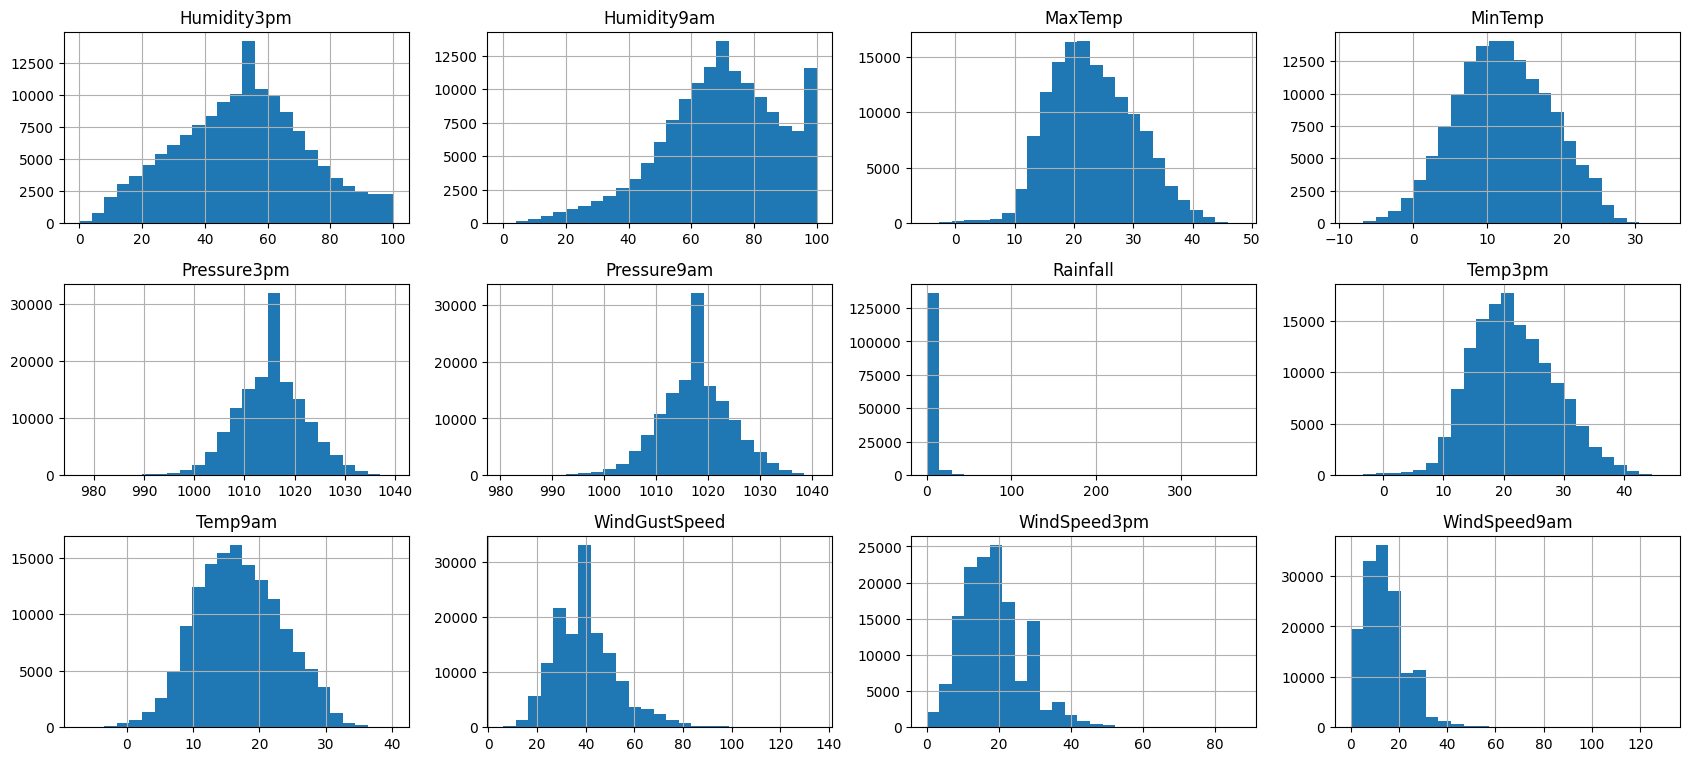

In [25]:
#Histogram for numerical columns
df1[num_cols1].hist(bins=25,figsize=(17,10),layout=(4,4))
plt.tight_layout()
plt.show()

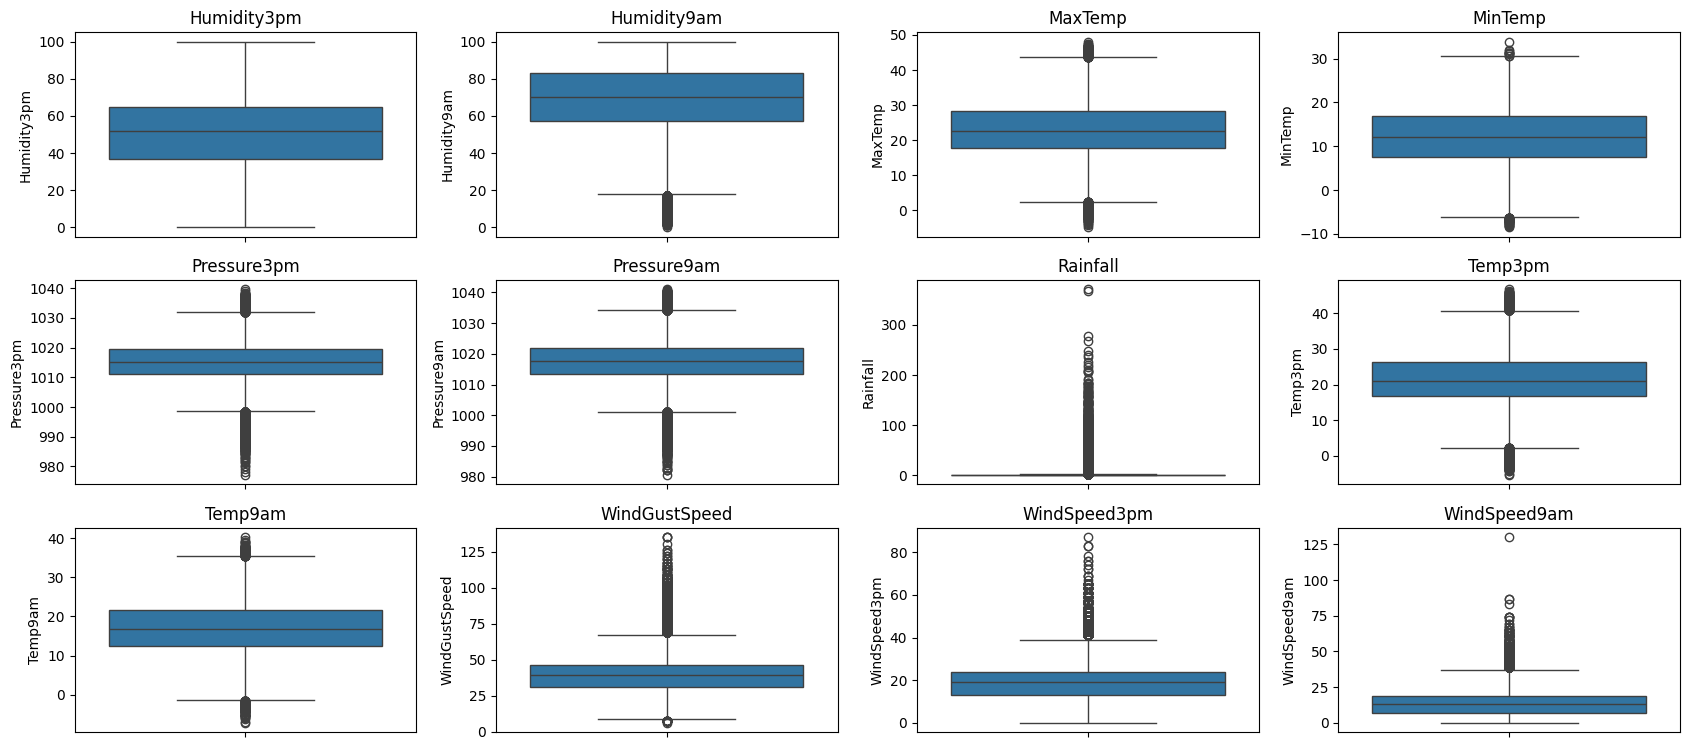

In [26]:
#Box plot to identify outliers
plt.figure(figsize=(17,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols1):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

*The outliers were retained, as they represent genuine weather variations rather than incorrect or anomalous measurements.*

#### CORRELATION

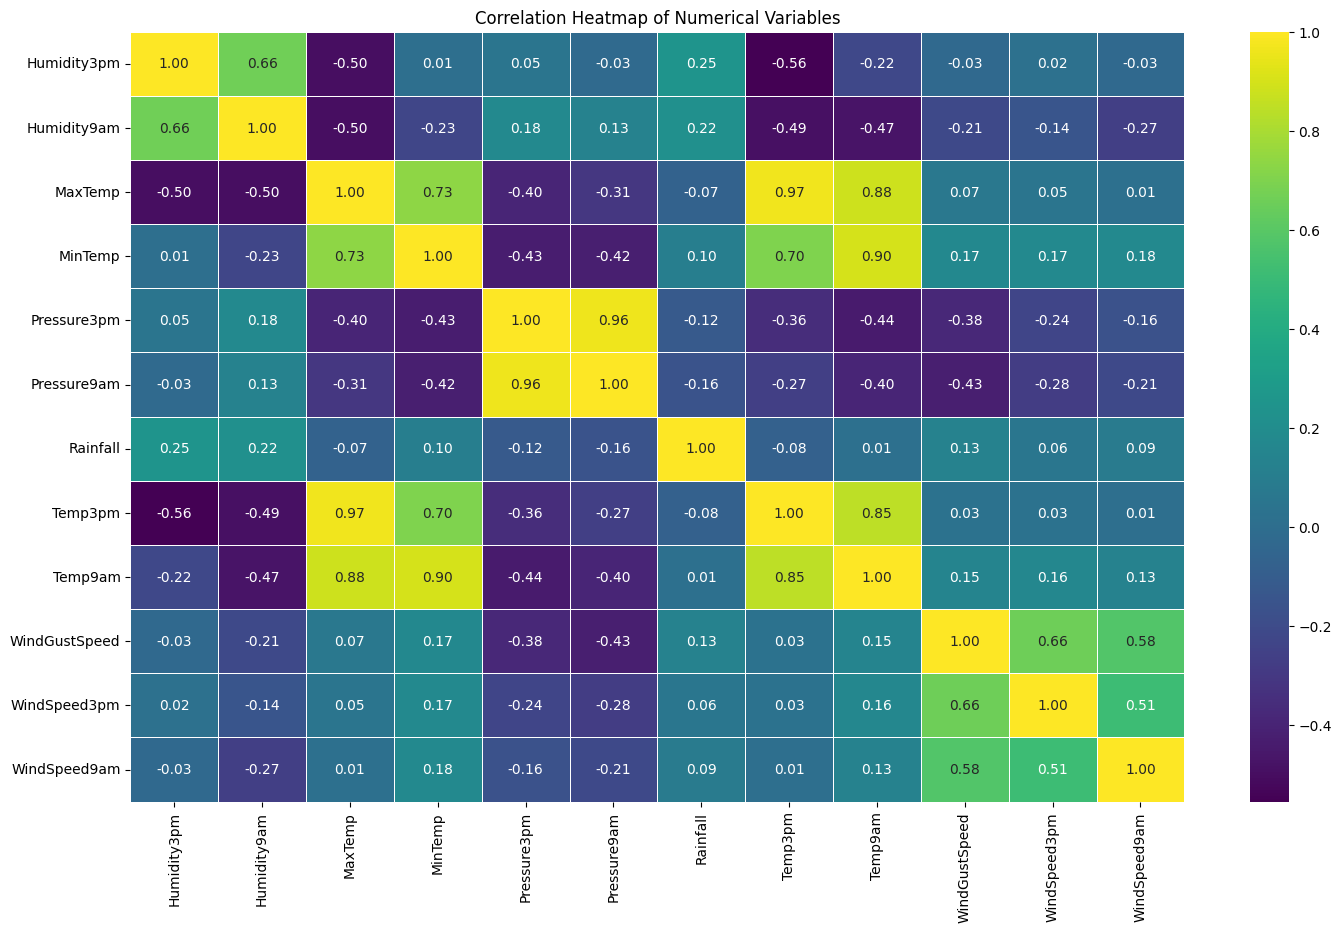

In [27]:
# Calculate the correlation matrix
correlation_matrix = df1[num_cols1].corr()

# Create the heatmap
plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### ANALYSING CATEGORICAL COLUMNS

In [28]:
#Finding unique values in each categorical column and its count
for column in cat_cols:
    unique_values = df1[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'], Length: 3436
Unique values in Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'], Length: 49
Unique values in WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW'], Length: 16
Unique values in WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE'], Length: 16
U

### <font color='BLUE'> VISUALIZATION </font>

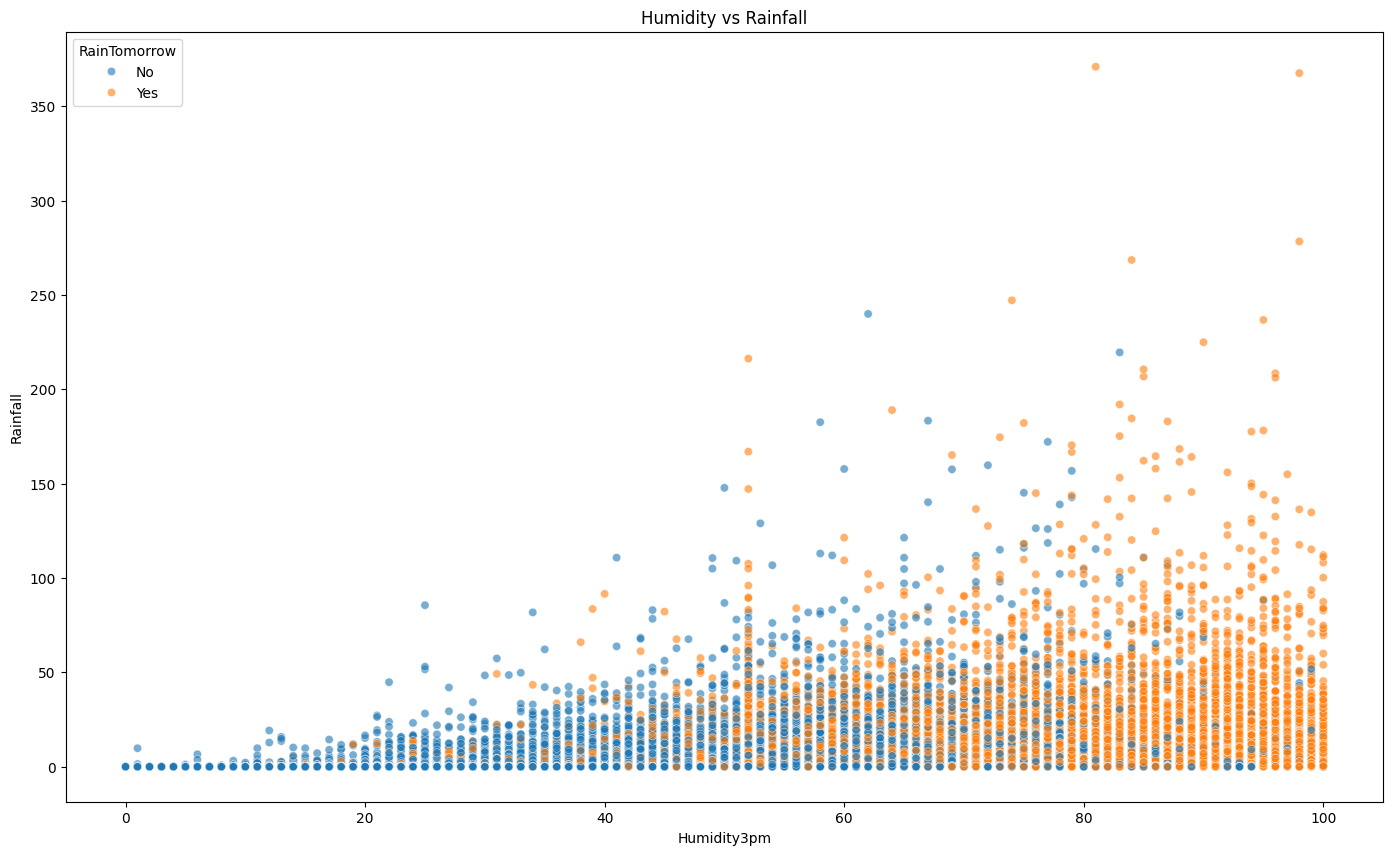

In [29]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=df1, x='Humidity3pm', y='Rainfall', hue='RainTomorrow', alpha=0.6)
plt.title("Humidity vs Rainfall")
plt.show()

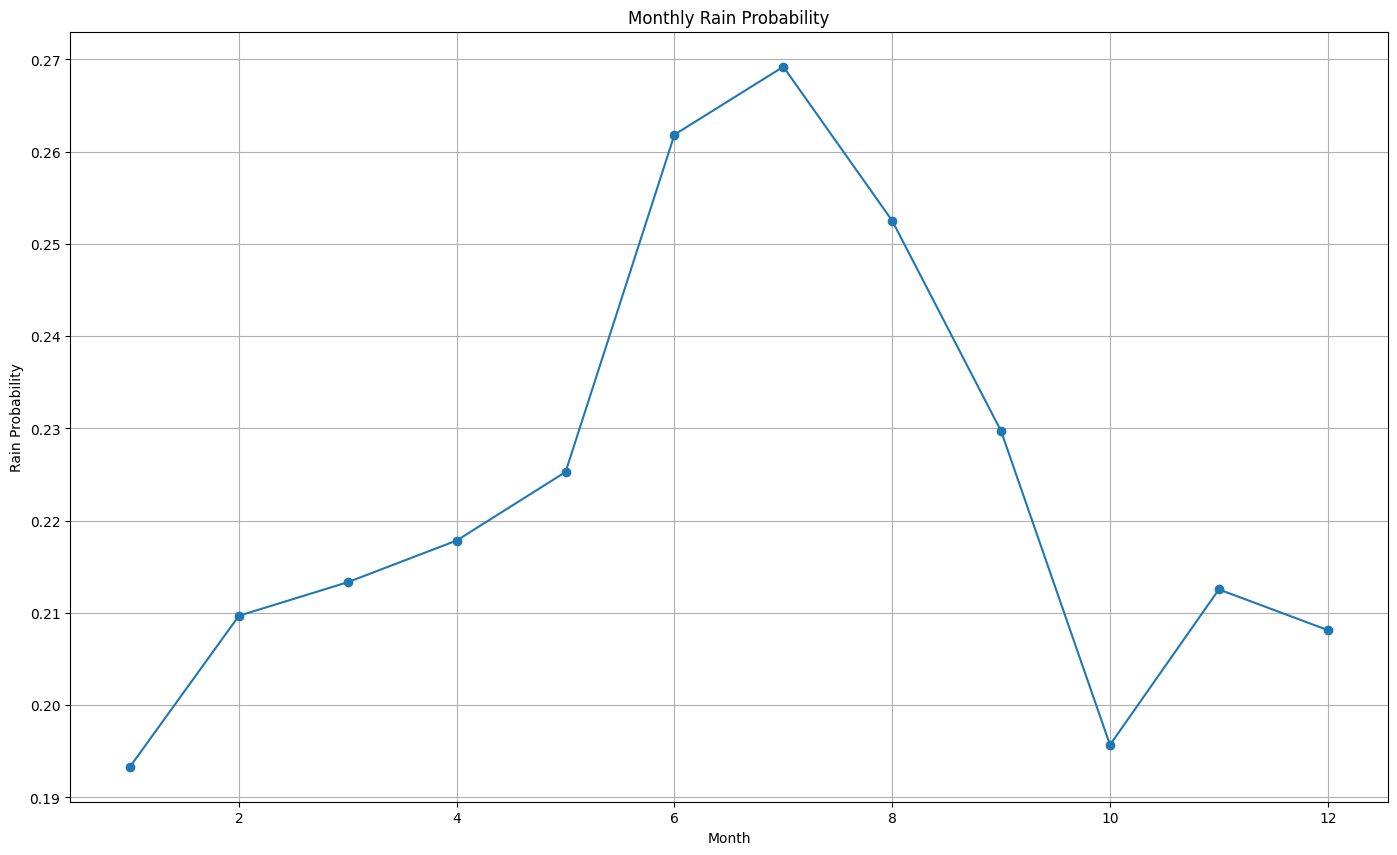

In [30]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month

monthly_trend = df1.groupby('Month')['RainTomorrow'].apply(lambda x: (x=='Yes').mean())

plt.figure(figsize=(17,10))
monthly_trend.plot(marker='o')
plt.title("Monthly Rain Probability")
plt.xlabel("Month")
plt.ylabel("Rain Probability")
plt.grid()
plt.show()

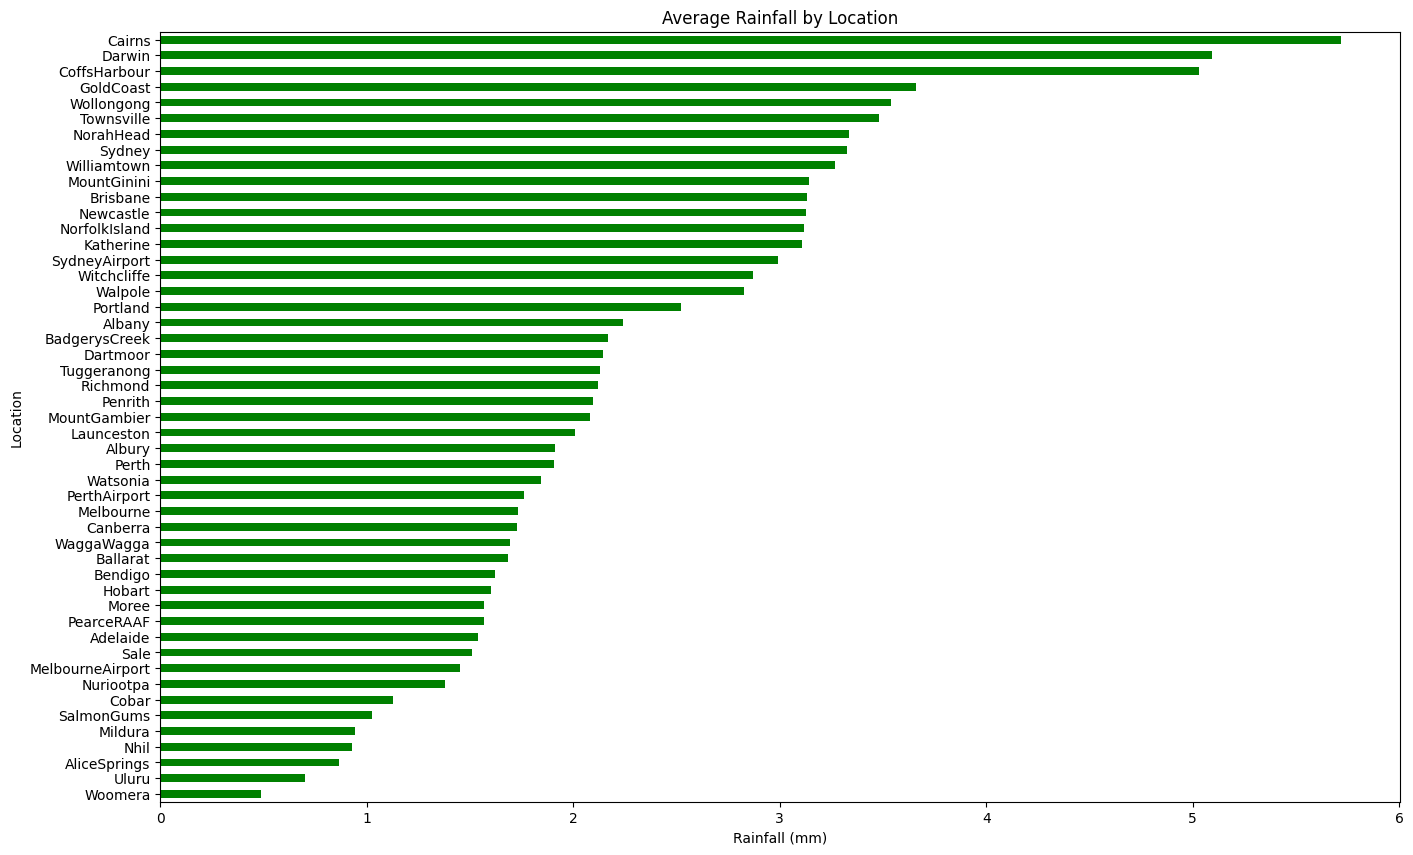

In [31]:
loc_rainfall = df1.groupby('Location')['Rainfall'].mean()

plt.figure(figsize=(16,10))
loc_rainfall.sort_values().plot(kind='barh', color='green')
plt.title("Average Rainfall by Location")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Location")
plt.show()


### <font color='BLUE'> FEATURE ENGINEERING </font>

#### FEATURE ENCODING

In [32]:
#Replacing values in target column
df1['RainTomorrow'] = df1['RainTomorrow'].replace({'No': 0, 'Yes': 1})

In [33]:
df1["RainToday"] = df1["RainToday"].replace({'No': 0, 'Yes': 1})

In [34]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output= False)

In [35]:
col_to_trans = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
ohe_col = ohe.fit_transform(df1[col_to_trans])

In [36]:
ohe_col_names = ohe.get_feature_names_out(col_to_trans)
ohe_df = pd.DataFrame(ohe_col,columns=ohe_col_names,index=df1.index)


In [37]:
df2 = pd.concat([df1,ohe_df],axis=1)
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
#Dropping redundant and irrelevent columns
df2.drop(columns=["Date",'Month','Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],inplace=True)

#### FEATURE SCALING

In [39]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [40]:
scale_columns = [
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [41]:
# Scaling the required numeric features using Standard Scaler
df2[scale_columns] = std.fit_transform(df2[scale_columns])

### <font color='BLUE'> DATA SPLITTING </font>

In [42]:
# Split dataset into features (x) and target variable(y)
x = df2.drop('RainTomorrow', axis=1)
x

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.190085,-0.045764,-0.204920,0.310479,0.678693,0.614071,0.113127,-1.436563,-1.474667,-1.220105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.749042,0.263677,-0.276125,0.310479,-1.128893,0.384757,-1.312997,-1.290451,-1.044798,-1.115343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.111824,0.348070,-0.276125,0.462679,0.565719,0.843386,-1.629913,-1.046931,-1.489490,-0.980648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.467304,0.671577,-0.276125,-1.211523,-0.338074,-1.105785,-1.260177,-1.728788,-0.007183,-0.367040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.831821,1.276393,-0.157450,0.082179,-0.789970,0.155443,0.694140,-0.900818,-1.015152,-1.384732,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,-1.359474,-0.200485,-0.276125,-0.678822,0.113823,-0.647157,-0.520706,-1.193043,1.045254,0.890109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145455,-1.469039,0.024563,-0.276125,-0.678822,-0.112126,-0.876471,-0.943261,-1.339155,1.030431,0.755415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,-1.343822,0.291808,-0.276125,-1.363723,-0.112126,-1.105785,-0.679164,-1.485267,0.867377,0.575822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,-1.062084,0.516856,-0.276125,-0.222222,-0.564022,-1.105785,-0.837622,-1.339155,0.496801,0.231603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
y=df2['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [44]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

#### UNDERSAMPLING

In [45]:
y_train.value_counts()

RainTomorrow
0    88252
1    25502
Name: count, dtype: int64

In [46]:
# Resampling the train data using near miss
from imblearn.under_sampling import NearMiss
u_sample = NearMiss()
x_train_res, y_train_res = u_sample.fit_resample(x_train, y_train)

*Resampling was performed to address class imbalance between rain and no-rain observations, ensuring the model learns equally from both classes and produces unbiased predictions.*

In [47]:
x_train_res

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-0.029045,-0.087961,-0.276125,-0.070021,-0.112126,0.040786,0.060307,0.024559,-0.007183,-0.007854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.029045,-0.087961,-0.276125,-0.070021,-0.112126,0.040786,0.060307,0.024559,-0.007183,-0.007854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.029045,-0.087961,-0.276125,-0.070021,-0.112126,0.040786,0.060307,0.024559,-0.007183,-0.007854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.029045,-0.087961,-0.276125,-0.070021,-0.112126,0.040786,0.060307,0.024559,-0.007183,-0.007854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.029045,-0.087961,-0.276125,-0.070021,-0.112126,0.040786,0.060307,0.024559,-0.007183,-0.007854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50999,-0.420348,-0.552122,-0.276125,-0.070021,0.565719,0.384757,0.535682,0.706417,0.304101,0.291467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51000,-0.655129,-1.452315,-0.181185,-0.374422,0.565719,0.155443,1.116695,1.583090,1.593708,1.488751,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51001,-1.829038,-1.227267,-0.276125,1.451981,-0.564022,-0.188528,0.694140,0.560304,0.096578,-0.726225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51002,-0.764694,-1.283529,-0.157450,1.223680,0.678693,0.843386,1.592069,2.313652,-0.170237,-0.112617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
y_train_res.value_counts()

RainTomorrow
0    25502
1    25502
Name: count, dtype: int64

*Use this training and testing sets in various classification algorithms*

### <font color='BLUE'> MODEL SELECTION </font>

##### Model training is performed using all the features without applying any feature selection techniques.

**Algorithms for Model Training and Evaluation:**
1. Logistic Regression
2. Decision Tree
3. Naive Bayers
4. K-Nearest Neighbors
5. Random Forest

These models were selected to compare linear (Logistic Regression), tree-based (Decision Tree, Random Forest), distance-based (KNN), and probabilistic (Naive Bayes) approaches, enabling a comprehensive evaluation of different learning strategies for rainfall prediction.

### <font color='BLUE'> MODEL TRAINING  </font>

### <font color='GREEN'>1.LOGISTIC REGRESSION </font>

In [ ]:
#Importing
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()

#Train the model with the provided training data
Logistic_Model.fit(x_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### <font color='GREEN'>2.DECISION TREE </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=10,
    min_samples_split=10,
    random_state=42)
decision_model.fit(x_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### <font color='GREEN'>3.NAIVE BAYES </font>

In [62]:
from sklearn.naive_bayes import BernoulliNB
naive_model=BernoulliNB()
naive_model.fit(x_train_res,y_train_res)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


### <font color='GREEN'>4.K NEAREST NEIGHBOUR (KNN) </font>

In [67]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_res,y_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### <font color='GREEN'>5.RANDOM FOREST </font>

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42)
rf_model.fit(x_train_res, y_train_res)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### <font color='BLUE'> MODEL EVALUATION  </font>

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


In [81]:
models = {
    "Logistic Regression": Logistic_Model,
    "Decision Tree": decision_model,
    "Naive Bayes": naive_model,
    "KNN": KNN_model,
    "Random Forest": rf_model
}


In [ ]:
results = []

for model_name, model in models.items():
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

In [84]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.753859,0.468583,0.731137,0.571131
1,Decision Tree,0.742923,0.450643,0.670275,0.538942
2,Naive Bayes,0.707901,0.406811,0.661490,0.503793
3,KNN,0.750343,0.459247,0.640784,0.535036
4,Random Forest,0.737473,0.447553,0.730196,0.554959


*Recall was prioritized over precision by applying class balancing through undersampling, ensuring the model minimizes missed rainfall events, which is critical for weather warning systems.*

*Undersampling reduced class bias and encouraged the model to detect more rain events, intentionally increasing recall at the cost of precision, which aligns with real-world forecasting requirements.*

##### *Logistic Regression performed better than other models, particularly by achieving higher recall, which is crucial for rainfall prediction tasks.*

In [86]:
y_pred_lr = Logistic_Model.predict(x_test)
y_pred_train_lr = Logistic_Model.predict(x_train_res)


test_accuracy = accuracy_score(y_test, y_pred_lr)
train_accuracy = accuracy_score(y_train_res, y_pred_train_lr)

if train_accuracy > test_accuracy + 0.10:
    print("Model Status: OVERFITTING")
elif test_accuracy < 0.60:
    print("Model Status: UNDERFITTING")
else:
    print("Model Status: GOOD FIT")



Model Status: GOOD FIT


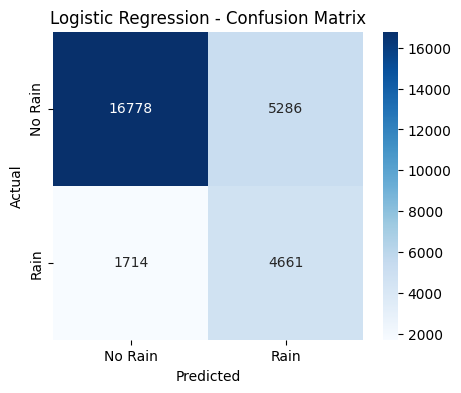

In [90]:
cm = confusion_matrix(y_test, y_pred_lr)

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Rain', 'Rain'],
    yticklabels=['No Rain', 'Rain']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [100]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22064
           1       0.47      0.73      0.57      6375

    accuracy                           0.75     28439
   macro avg       0.69      0.75      0.70     28439
weighted avg       0.81      0.75      0.77     28439



### <font color='BLUE'> HYPERPARAMETER TUNING </font>

#### LOGISTIC REGRESSION

In [94]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Base model
lr = LogisticRegression(random_state=42)

# Parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # supports l1 + l2
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000]
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='f1',   # or 'recall'
    cv=cv,
    n_jobs=-1,
    verbose=2
)


In [95]:
# Fit on RESAMPLED training data
grid.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [None, 'balanced'], 'max_iter': [500, 1000], 'penalty': ['l1', 'l2'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [96]:
y_pred_grid = grid.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred_grid)

0.7532613664334189

In [98]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22064
           1       0.47      0.73      0.57      6375

    accuracy                           0.75     28439
   macro avg       0.69      0.75      0.70     28439
weighted avg       0.81      0.75      0.77     28439



In [99]:
# Best model
best_lr = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.755414129895456




*Hyperparameter tuning was applied to the Logistic Regression model using GridSearchCV. However, the tuned model produced performance metrics very similar to the baseline, with no notable improvement in accuracy, precision, recall, or F1-score.*

*This suggests that the baseline model had already learned the key patterns in the data, and further tuning offered limited gains. Therefore, the baseline Logistic Regression model was retained due to its stable performance, interpretability, and consistent recall for rainfall prediction.*


### <font color='BLUE'> RESULT </font>

After training and evaluating multiple machine learning models to predict **next-day rainfall** using historical weather data, model performance was assessed using key evaluation metrics including **accuracy**, **precision**, **recall**, and **F1-score**. The models evaluated in this study include **Logistic Regression**, **Decision Tree**, **Naive Bayes**, **K-Nearest Neighbors (KNN)**, and **Random Forest** classifiers.

Among the models tested, **Logistic Regression** emerged as the **most consistent and reliable performer**. It achieved an overall **accuracy of approximately 75.39%** while demonstrating the **highest recall of 73.11%** for the rain class. High recall is particularly important for rainfall prediction systems, as it minimizes **false negatives** and ensures that most rainy days are correctly identified. This makes Logistic Regression well-suited for **weather warning and early-alert applications**.

The **Decision Tree**, **KNN**, and **Random Forest** models achieved comparable accuracy values in the range of **73%–75%**. While **Random Forest** also showed a **high recall of 73.02%**, its precision was lower than that of Logistic Regression, indicating a higher rate of false positives. **Decision Tree** and **KNN** exhibited lower recall values, suggesting a higher likelihood of missing actual rainfall events.

The **Naive Bayes** model showed the **lowest overall performance**, with reduced accuracy and F1-score compared to the other models, indicating limited effectiveness for this dataset.

Overall, although several models delivered similar accuracy, **Logistic Regression provided the best balance between recall, precision, and model interpretability**. Its stable performance and improved sensitivity toward rainfall events justify its selection as the **final model for next-day rain prediction**.

### <font color='BLUE'> MODEL DEPLOYMENT </font>

#### SAVING MODEL

In [101]:
import pickle

pickle.dump(Logistic_Model,open("rain_classifier.sav","wb"))

In [102]:
pickle.dump(ohe,open("onehot_encoder.sav","wb"))

In [103]:
pickle.dump(std,open("scaler.sav","wb"))

### <font color='BLUE'> LIMITATIONS </font>

1. **Class Imbalance**: The target variable is highly imbalanced, which can bias the model toward the majority class and affect prediction reliability for rainfall events.

2. **Data Dependency**: Model performance is constrained by the quality and patterns of historical weather data and may not generalize well to unseen climatic conditions.

3. **Missing and Dropped Features**: Some features with high missing values were removed, which may result in loss of potentially useful information.

4. **Undersampling Information Loss**: Undersampling may remove potentially valuable majority-class data, which could limit the model’s ability to generalize fully.


### <font color='BLUE'> CONCLUSION </font>



This project successfully developed a **machine learning–based rainfall prediction system** using historical weather data. Effective **data preprocessing**, feature encoding, scaling, and **class imbalance handling** contributed to improved model performance.

Among the evaluated models, **Logistic Regression** delivered the most **balanced results**, particularly achieving higher **recall**, making it suitable for rainfall prediction where detecting rain events is critical.

Overall, the project demonstrates how **data-driven models can support early weather warnings and decision-making**, with scope for further enhancement using real-time data and advanced ensemble methods.
